In [4]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from fiona.crs import from_epsg
import datetime as dt

In [5]:
from sodapy import Socrata

ModuleNotFoundError: No module named 'sodapy'

# Load Data

In [784]:
client= Socrata("data.cityofnewyork.us", app_token='Yg4oAPuNiaHUnCGxDqUNAHqN8')

NameError: name 'Socrata' is not defined

In [ ]:
df= pd.DataFrame(client.get("bkfu-528j", where='event_agency = \'Parks Department\'', limit=2000000))

In [ ]:
df.shape

In [ ]:
path_raw= r'M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\RAW\Parks Historical Permits'

In [ ]:
df.to_csv(join(path_raw, '190612_ParksPermits.csv'))

In [ ]:
df2= df[~df.duplicated()].copy()

# Load CSV

In [6]:
df= pd.read_csv(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\RAW\Parks Historical Permits\190612_ParksPermits.csv",index_col=0)

C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (8,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [7]:
df2= df[~df.duplicated()].copy().reset_index(drop=True)

In [8]:
df2.shape

(228844, 12)

# Investigate

In [9]:
df2.head()

,community_board,end_date_time,event_agency,event_borough,event_id,event_location,event_name,event_street_side,event_type,police_precinct,start_date_time,street_closure_type
0,"3,",2013-08-03T19:30:00.000,Parks Department,Manhattan,81202,Tompkins Square Park: Old Bandshell,Rally,NaN,Special Event,"9,",2013-08-03T12:00:00.000,NaN
1,"7,",2017-11-18T20:00:00.000,Parks Department,Manhattan,368421,"Damrosch Park: Damrosch Park ,Damrosch Park: T...",Big Apple Circus,NaN,Special Event,"20,",2017-11-18T19:00:00.000,NaN
2,"6,",2014-06-28T15:59:00.000,Parks Department,Brooklyn,161541,Thomas Greene Playground: Sitting Area,Slash into Summer,NaN,Special Event,"78,",2014-06-28T14:00:00.000,NaN
3,"13,",2010-06-18T22:30:00.000,Parks Department,Brooklyn,19918,SURF AVENUE between WEST 10 STREET and WEST...,Coney Island Friday Night Fireworks 2010,South,Special Event,"60,",2010-06-18T21:30:00.000,Full Street Closure
4,"08,",2016-02-13T20:00:00.000,Parks Department,Brooklyn,259797,"St. John's Park: Buddy Keaton-Soccer-01 ,St. J...",Miscellaneous,NaN,Construction,"77,",2016-02-13T07:00:00.000,NaN


In [10]:
df2['event_location'].head()

0                 Tompkins Square Park: Old Bandshell 
1    Damrosch Park: Damrosch Park ,Damrosch Park: T...
2            Thomas Greene Playground: Sitting Area   
3     SURF AVENUE between WEST   10 STREET and WEST...
4    St. John's Park: Buddy Keaton-Soccer-01 ,St. J...
Name: event_location, dtype: object

In [11]:
df2.columns

Index(['community_board', 'end_date_time', 'event_agency', 'event_borough',
       'event_id', 'event_location', 'event_name', 'event_street_side',
       'event_type', 'police_precinct', 'start_date_time',
       'street_closure_type'],
      dtype='object')

## Distribution of Event Types
* With construction permits: 228,844
* Without construction permits: 215,054

In [12]:
df2['event_type'].value_counts()

Special Event                   214506
Construction                     13790
Concert                            272
Athletic Race / Tour                79
Commercial Promotional Event        74
Miscellaneous                       56
Religious Event                     18
Sidewalk Sale                       17
Press Conference Media               8
Parade                               7
Street Festival                      6
Marathon                             5
Clean-Up                             1
Red Carpet Event                     1
Block Party                          1
Farmers Market                       1
Film Shoot / Production              1
Urban Art Program                    1
Name: event_type, dtype: int64

In [13]:
#Filter to remove construction
construction= (~(df2['event_type']=='Construction'))

In [14]:
df2[construction]['event_type'].value_counts()

Special Event                   214506
Concert                            272
Athletic Race / Tour                79
Commercial Promotional Event        74
Miscellaneous                       56
Religious Event                     18
Sidewalk Sale                       17
Press Conference Media               8
Parade                               7
Street Festival                      6
Marathon                             5
Film Shoot / Production              1
Urban Art Program                    1
Block Party                          1
Clean-Up                             1
Farmers Market                       1
Red Carpet Event                     1
Name: event_type, dtype: int64

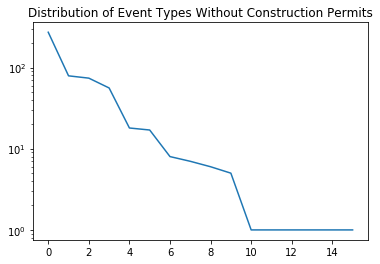

In [15]:
plt.plot(df2[construction]['event_type'].value_counts().values[1:])
plt.title('Distribution of Event Types Without Construction Permits')
plt.yscale('log');

In [16]:
specialev= df2[df2['event_type']=='Special Event']['event_name'].value_counts()

In [17]:
df_construction= df2.copy()
df2= df2[construction].copy().reset_index(drop=True)

In [18]:
df_construction.shape

(228844, 12)

In [19]:
df2.shape

(215054, 12)

## Distribution of Event Names

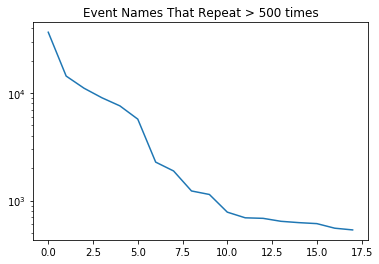

In [20]:
df2['event_clean']= df2['event_name'].str.lower().str.replace("[.;,:']",'').str.strip()
ev_values= df2['event_clean'].value_counts()
plt.plot(ev_values[ev_values>500].values)
plt.yscale('log')
plt.title('Event Names That Repeat > 500 times');

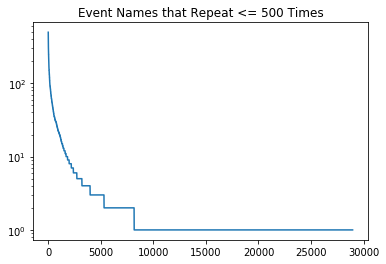

In [21]:
plt.plot(ev_values[ev_values<=500].values)
plt.title('Event Names that Repeat <= 500 Times')
plt.yscale('log');

In [22]:
len(df2['event_clean'].unique())

28979

In [23]:
len(df2['event_name'].unique())

30559

In [24]:
len(df2['event_name'])

215054

In [25]:
df2['event_clean'].value_counts()

miscellaneous                                                                            36690
celebration                                                                              14362
party                                                                                    11070
picnic                                                                                    9022
athletic event non sports                                                                 7591
barbecue                                                                                  5714
lawn maintenance                                                                          2278
model helicopter flying                                                                   1885
super soccer stars                                                                        1229
radio control airplanes                                                                   1140
big apple circus                                  

In [26]:
len(df2[(df2['event_clean'].str.contains('construction'))|(df2['event_clean'].str.contains('maintenance'))]['event_type'])
#3,433 events have construction or maintenance in the name but do not list construction as the event type

3433

Note: removing all construction and maintenance events

In [27]:
df2= df2[~((df2['event_clean'].str.contains('construction'))|(df2['event_clean'].str.contains('maintenance')))]

In [28]:
print('{}% of permit event names are unique'\
          .format(str(round(len(df2['event_clean'].unique())*100/len(df2), 2))))
print('{}% of permit events have unique names and locations'\
          .format(str(round(len(df2[df2[['event_clean','event_location']].duplicated()])*100/len(df2), 2))))

13.69% of permit event names are unique
76.93% of permit events have unique names and locations


__Masks__

In [1098]:
mask_bbq= df2['event_clean'].str.lower().str.contains('bbq')
mask_barbecue= df2['event_clean'].str.lower().str.contains('barbecue')
mask_picnic= df2['event_clean'].str.lower().str.contains('picnic')
mask_farmers= df2['event_clean'].str.lower().str.contains('farmers market')
mask_party= df2['event_clean'].str.lower().str.contains('party')
mask_celebration= df2['event_clean'].str.lower().str.contains('celebration')

In [1099]:
print('{}% of permit events are barbeques, picnics, or farmer\'s markets, i.e. {} events.'\
          .format(str(round((mask_bbq|mask_barbecue|mask_picnic|mask_farmers).sum()*100/len(df2), 2)),\
             (mask_bbq|mask_barbecue|mask_picnic|mask_farmers).sum()))

9.27% of permit events are barbeques, picnics, or farmer's markets, i.e. 19615 events.


In [1100]:
print('{}% of permit events are parties or celebrations, i.e. {} events.'\
          .format(str(round((mask_party|mask_celebration).sum()*100/len(df2), 2)),\
             (mask_party|mask_celebration).sum()))

13.16% of permit events are parties or celebrations, i.e. 27843 events.


In [1101]:
#Free
mask_free= df2['event_clean'].str.contains('free')
#Athletics
mask_sports= df2['event_clean'].str.contains("zumba|basketball|baseball|\
football|cycling|run|sport|bocce|juggling|bike|field|gymnastics|soccer|\
skate|athletic|yoga|cross country|swim|hike|recreation|game|frisbee|handball")

#Outdoor Recreation/Nature
mask_nature= df2['event_clean'].str.contains("natur|outdoor|fishing|walk|river")

In [1102]:
print('{}% of permit events have free in the title, i.e. {} events.'\
          .format(str(round((mask_free).sum()*100/len(df2), 2)),\
             (mask_free).sum()))

0.81% of permit events have free in the title, i.e. 1713 events.


In [1103]:
print('{}% of permit events are athletic events, i.e. {} events.'\
          .format(str(round((mask_sports).sum()*100/len(df2), 2)),\
                             (mask_sports).sum()))

16.66% of permit events are athletic events, i.e. 35252 events.


In [1104]:
print('{}% of permit events are non-athletic outdoor recreation, i.e. {} events.'\
          .format(str(round((mask_nature).sum()*100/len(df2), 2)),\
                             (mask_nature).sum()))

2.34% of permit events are non-athletic outdoor recreation, i.e. 4960 events.


In [1105]:
#Movies and entertainment
mask_allentert= df2['event_clean'].str.contains("music|stage|entertainment|concert|performance|movie|film|dance")

In [1106]:
print('{}% of permit events are movies, performances, concerts, or entertainment events, i.e. {} events.'\
          .format(str(round((mask_allentert).sum()*100/len(df2), 2)),\
                             (mask_allentert).sum()))

4.15% of permit events are movies, performances, concerts, or entertainment events, i.e. 8791 events.


In [1107]:
selevents= (mask_bbq|mask_barbecue|mask_picnic|mask_farmers).sum()+(mask_sports).sum()+\
                                (mask_party|mask_celebration).sum()+\
                                (mask_allentert).sum()
mask_selectevents= (mask_bbq|mask_barbecue|mask_picnic|mask_farmers|mask_sports|\
                                mask_party|mask_celebration|mask_allentert)
np.round(selevents*100/len(df2),2)

43.24

__Uncategorized Events__

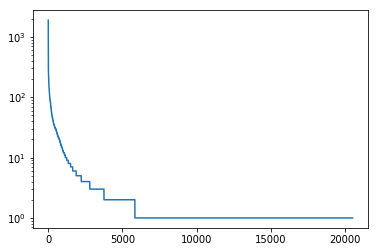

In [1108]:
plt.plot(df2[~((mask_selectevents)|(df2['event_clean']=='miscellaneous'))]['event_clean'].value_counts().values)
plt.yscale('log');

In [1109]:
#Number uncategorized
np.around(len(df2[~((mask_selectevents))]['event_clean'])*100/len(df2),2)

57.02

__Summary:__
* Number of unique cleaned event names: 29,097
* Number of unique event names: 30,681
* All event names: 228,844
* 43% of all events are either barbecues, picnics, farmers markets, athletic events, parties, celebrations, concerts, movies, or performances.
* 57% are uncategorized

## Locate

In [1261]:
parks= gpd.read_file(r"S:\NYC_GIS_DATA\NYC_PARKS_DATA\NYC_PARKS_DATA\NYCPARKS_ALLSITES.shp")

In [1262]:
def try_i(x, i=0):
    try:
        return x[i]
    except TypeError:
        return np.nan

In [1263]:
df2['park_short']= df2['event_location'].str.replace('(',':').str.split(':').apply(lambda x: try_i(x))

In [1264]:
df2['parkname_length']=df2['park_short'].str.len()

Isolating unidentifiable locations:

In [824]:
#Isolates event locations for which the split function might not have worked
# i.e. the name of the park is greater than 40 characters
t= df2[df2['parkname_length']>40].copy()
t.shape

(1072, 15)

In [1396]:
#Park names that are addresses
df2[(df2['park_short'].notna())&(df2['park_short'].str.contains('between'))]

,community_board,end_date_time,event_agency,event_borough,event_id,event_location,event_name,event_street_side,event_type,police_precinct,...,end_date_time_t,year,start_time,end_time,duration,park_short,parkname_length,park_lower,park_tomerge,BOROUGH
3,13,2010-06-18T22:30:00.000,Parks Department,Brooklyn,19918,SURF AVENUE between WEST 10 STREET and WEST...,Coney Island Friday Night Fireworks 2010,South,Special Event,60,...,2010-06-18 22:30:00,2010,21:30:00,22:30:00,0 days 01:00:00,SURF AVENUE between WEST 10 STREET and WEST...,58.0,surf avenue between west 10 street and west ...,surf avenue between west 10 street and west ...,B
238,5,2009-04-27T13:00:00.000,Parks Department,Manhattan,8985,WEST 35 STREET between BROADWAY and 6 AVENU...,Propel Water Sampling,South,Special Event,14,...,2009-04-27 13:00:00,2009,07:00:00,13:00:00,0 days 06:00:00,WEST 35 STREET between BROADWAY and 6 AVENU...,96.0,west 35 street between broadway and 6 avenue...,west 35 street between broadway and 6 avenue...,M
305,25,2010-03-20T23:00:00.000,Parks Department,Manhattan,15992,14TH STREET between UNION SQUARE WEST and 4 A...,US Census 2010,North,Commercial Promotional Event,139,...,2010-03-20 23:00:00,2010,07:00:00,23:00:00,1 days 16:00:00,14TH STREET between UNION SQUARE WEST and 4 A...,51.0,14th street between union square west and 4 av...,14th street between union square west and 4 av...,M
451,13,2009-09-06T22:30:00.000,Parks Department,Brooklyn,10492,SURF AVENUE between WEST 8 STREET and WEST...,Friday Night Fireworks,South,Miscellaneous,60,...,2009-09-06 22:30:00,2009,21:30:00,22:30:00,0 days 01:00:00,SURF AVENUE between WEST 8 STREET and WEST...,58.0,surf avenue between west 8 street and west ...,surf avenue between west 8 street and west ...,B
1048,556,2009-12-22T19:00:00.000,Parks Department,Brooklyn,14635,PLAZA STREET WEST between LINCOLN PLACE and U...,Menorah Lighting Ceremony,Both,Religious Event,78,...,2009-12-22 19:00:00,2009,18:00:00,19:00:00,0 days 01:00:00,PLAZA STREET WEST between LINCOLN PLACE and U...,57.0,plaza street west between lincoln place and un...,plaza street west between lincoln place and un...,B
1271,556,2009-12-09T19:00:00.000,Parks Department,Brooklyn,14635,PLAZA STREET WEST between LINCOLN PLACE and U...,Menorah Lighting Ceremony,Both,Religious Event,78,...,2009-12-09 19:00:00,2009,18:00:00,19:00:00,0 days 01:00:00,PLAZA STREET WEST between LINCOLN PLACE and U...,57.0,plaza street west between lincoln place and un...,plaza street west between lincoln place and un...,B
1505,11,2009-03-14T11:00:00.000,Parks Department,Manhattan,7380,5 AVENUE between EAST 102 STREET and EAST 1...,New York Road Runners 8000,West,Athletic Race / Tour,23,...,2009-03-14 11:00:00,2009,08:30:00,11:00:00,0 days 02:30:00,5 AVENUE between EAST 102 STREET and EAST 1...,55.0,5 avenue between east 102 street and east 10...,5 avenue between east 102 street and east 10...,M
1603,7,2010-10-23T17:30:00.000,Parks Department,Manhattan,15965,COLUMBUS AVENUE between WEST 77 STREET and ...,Crafts on Columbus,East,Sidewalk Sale,20,...,2010-10-23 17:30:00,2010,10:00:00,17:30:00,0 days 07:30:00,COLUMBUS AVENUE between WEST 77 STREET and ...,62.0,columbus avenue between west 77 street and w...,columbus avenue between west 77 street and w...,M
2094,5,2009-06-29T19:00:00.000,Parks Department,Manhattan,10569,WEST 34 STREET between BROADWAY and 6 AVENUE,Oxygen TV's Dance Your Ass Off Promotion,NaN,Commercial Promotional Event,14,...,2009-06-29 19:00:00,2009,11:00:00,19:00:00,0 days 08:00:00,WEST 34 STREET between BROADWAY and 6 AVENUE,47.0,west 34 street between broadway and 6 avenue,west 34 street between broadway and 6 avenue M,M
2166,8,2008-08-17T18:00:00.000,Parks Department,Manhattan,1720,5 AVENUE between EAST 72 STREET,SummerStage Concert,East,Concert,19,...,2008-08-17 18:00:00,2008,15:00:00,18:00:00,0 days 03:00:00,5 AVENUE between EAST 72 STREET,34.0,5 avenue between east 72 street,5 avenue between east 72 street M,M


In [1358]:
df2['police_precinct']= df2['police_precinct'].str.replace(',','').str.replace(' ','')
df2['community_board']= df2['community_board'].str.replace(',','').str.replace(' ','')

In [1342]:
df2.loc[df2['event_borough']=='Manhattan','BOROUGH']='M'
df2.loc[df2['event_borough']=='Bronx','BOROUGH']='X'
df2.loc[df2['event_borough']=='Staten Island','BOROUGH']='R'
df2.loc[df2['event_borough']=='Queens','BOROUGH']='Q'
df2.loc[df2['event_borough']=='Brooklyn','BOROUGH']='B'

In [828]:
len(df2['park_short'].unique())

1387

In [829]:
len(parks['GISPROPNUM'].unique())

1709

In [830]:
len(parks['SIGNNAME'].unique())

1527

In [831]:
parks[parks['SIGNNAME'].duplicated()][['GISPROPNUM','SIGNNAME']]

,GISPROPNUM,SIGNNAME
193,B255B,Park
204,B111A,Washington Park
207,B210V,Park
213,B255N,Park
271,Q220A,Park
289,Q393C,LaGuardia Landing Lights
290,Q393E,LaGuardia Landing Lights
333,B017,Bushwick Playground
358,B112,Lot
360,B113C,Columbus Park


A lot of random parks have no identifying sign name, it only says: park.

In [832]:
df2['park_short'].value_counts().head(10)

Central Park                    38254
Prospect Park                   11213
Bryant Park                      6110
Riverside Park                   5211
Flushing Meadows Corona Park     5024
Marine Park                      4710
Union Square Park                4122
Van Cortlandt Park               4055
Cunningham Park                  3737
Randall's Island Park            3490
Name: park_short, dtype: int64

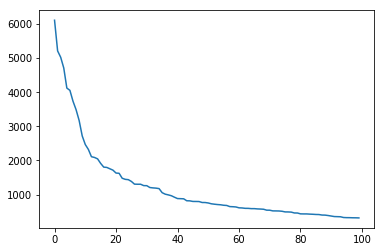

In [1397]:
"""
Central and Prospect Park are huge outliers.
This graph shows the total number of events at the next 100 parks
"""
plt.plot(df2['park_short'].value_counts().head(102).values[2:]);

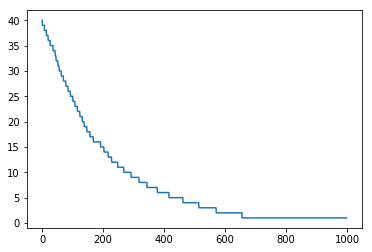

In [834]:
"""
The total number of events at the last 1000 parks
"""
plt.plot(df2['park_short'].value_counts().values[-1000:-1]);

In [835]:
u_parks= parks['SIGNNAME'].str.lower().unique()

In [836]:
len(u_parks)

1526

In [837]:
u_parks

array(['queensbridge park', 'ambrosini field', 'socrates sculpture park',
       ..., 'jackie robinson parkway', 'prospect park',
       'greenpoint landing'], dtype=object)

In [838]:
df2['park_short']= df2['park_short'].str.lower()

In [839]:
mask_overlap= df2['park_short'].isin(u_parks)

In [840]:
# 91% of permits (208k) can be matched to a park
round(mask_overlap.sum()*100/len(df2), 2)

90.33

In [841]:
# 840 matched parks
len(df2[mask_overlap]['park_short'].unique())

840

In [842]:
np.around(len(df2[mask_overlap]['park_short'].unique())*100/len(parks['GISPROPNUM'].unique()),2)

49.15

In [843]:
# 55% of matched parks (841) have at least 1 permit
round(len(df2[mask_overlap]['park_short'].unique())*100/len(u_parks), 2)

55.05

__Summary:__
* 725 events have addresses as their identifying location.
* 1,072 events have locations that are longer than 40 characters.
* 840 unique event locations have a clear match in the New York City parks data.
* These matched event locations represent 49% of all New York City parks and 55% of New York City park signs.
* 91% of all permitted events can be matched to a park
* There are 1,526 unique sign names in New York City.
* There are 1,709 parks in the New York City parks data.

## Event ID
* Do event ids correspond to unique event occurrences?

In [1113]:
#Filter to remove duplicate event_ids
eventid= (~df2.duplicated('event_id'))

In [1122]:
#Number of unique event ids
len(df2['event_id'].unique())

101839

In [1123]:
df2.columns

Index(['community_board', 'end_date_time', 'event_agency', 'event_borough',
       'event_id', 'event_location', 'event_name', 'event_street_side',
       'event_type', 'police_precinct', 'start_date_time',
       'street_closure_type', 'event_clean'],
      dtype='object')

In [1140]:
#Number of events with different event ids and different event names
len(df2[~df2.duplicated(['event_id','event_clean'])])

101907

In [1157]:
round(len(df2[~df2.duplicated(['event_id','event_clean'])])*100/len(df2),2)

48.16

In [1159]:
#Number of events with different event ids and different start times
len(df2[~df2.duplicated(['event_id','start_date_time'])])

210851

In [1160]:
round(len(df2[~df2.duplicated(['event_id','start_date_time'])])*100/len(df2),2)

99.64

In [1134]:
#The event id seems to refer to the same event, but they might need to take out different permits for different days?
df2[df2.duplicated(['event_id','event_clean'])].sort_values('event_id').head()

,community_board,end_date_time,event_agency,event_borough,event_id,event_location,event_name,event_street_side,event_type,police_precinct,start_date_time,street_closure_type,event_clean
16576,"8,",2009-08-07T09:00:00.000,Parks Department,Manhattan,9812,FIFTH AVENUE between EAST 71 STREET and EAS...,Good Morning America Concert Series,West,Concert,"19,",2009-08-07T08:30:00.000,Full Street Closure,good morning america concert series
45846,"8,",2009-07-10T09:00:00.000,Parks Department,Manhattan,9812,FIFTH AVENUE between EAST 71 STREET and EAS...,Good Morning America Concert Series,West,Concert,"19,",2009-07-10T08:30:00.000,Full Street Closure,good morning america concert series
52898,"8,",2009-06-05T09:00:00.000,Parks Department,Manhattan,9812,FIFTH AVENUE between EAST 71 STREET and EAS...,Good Morning America Concert Series,West,Concert,"19,",2009-06-05T08:30:00.000,Full Street Closure,good morning america concert series
111839,"8,",2009-07-24T09:00:00.000,Parks Department,Manhattan,9812,FIFTH AVENUE between EAST 71 STREET and EAS...,Good Morning America Concert Series,West,Concert,"19,",2009-07-24T08:30:00.000,Full Street Closure,good morning america concert series
65098,"8,",2009-08-14T09:00:00.000,Parks Department,Manhattan,9812,FIFTH AVENUE between EAST 71 STREET and EAS...,Good Morning America Concert Series,West,Concert,"19,",2009-08-14T08:30:00.000,Full Street Closure,good morning america concert series


In [1139]:
round(len(df2[~df2.duplicated(['event_id','start_date_time','event_clean'])])*100/len(df2),2)

99.69

In [1115]:
np.round(len(df2['event_id'].unique())*100/len(df2),decimals=1)

48.1

In [1116]:
path_parks= r'M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\RAW\Parks Events Listing\190513_download'

In [1117]:
event= pd.read_csv(join(path_parks, 'NYC_Parks_Events_Listing___Event_Listing.csv'))

In [1118]:
len(event['event_id'].unique())

74880

In [1400]:
event['event_id'].isin(df2['event_id'].unique()).sum()

18805

In [981]:
df2[eventid]['event_id'].isin(event['event_id']).sum()

18805

In [1402]:
df2['event_id'].isin(event['event_id'].unique()).sum()*100/len(df2)

17.104162630362772

__Summary:__
* Unique events by the event_id: 102,057, 45% of all entries in the dataset.
* Number of unique event_ids that overlap with the previous dataset: 18,808.
* Number of event_ids in the current dataset that were in the previous dataset: 36,203 (this includes duplicates).
* Although there are duplicates in the event ids, 99% (almost 100%) of the data has a different event_id, start_date_time, event_name combination. Duplicate events, for example, are a summer concert series that has events sprinkled throughout the summer.
* 99% of events have a unique event_id and start_date_time combination.
* 48% of the data has a unique event_id and event_name combination.


## Time
### Setting up date, time, duration
* Converts to datetime
* Calculates duration times
* Plots the range of duration times

In [1143]:
df2['start_date_time_t']= pd.to_datetime(df2['start_date_time'],format="%Y/%m/%d")
df2['end_date_time_t']= pd.to_datetime(df2['end_date_time'],format="%Y/%m/%d")

In [1144]:
df2['start_date_time_t'].sort_values().min()

Timestamp('2008-01-12 09:00:00')

In [1145]:
df2['start_date_time_t'].sort_values().max()

Timestamp('2019-07-12 15:00:00')

In [1146]:
df2['start_date_time'].min()

'2008-01-12T09:00:00.000'

In [1147]:
df2['end_date_time'].max()

'2019-07-12T23:59:00.000'

In [1148]:
df2['year']= df2['start_date_time_t'].dt.year
df2['start_time']= df2['start_date_time_t'].dt.time
df2['end_time']= df2['end_date_time_t'].dt.time

In [1149]:
df2['duration']= df2['end_date_time_t']-df2['start_date_time_t']

In [1403]:
mindur= df2['duration'].min().total_seconds()/60
mindur

-1320.0

In [1404]:
maxdur= df2['duration'].max().total_seconds()/60
maxdur

390239.0

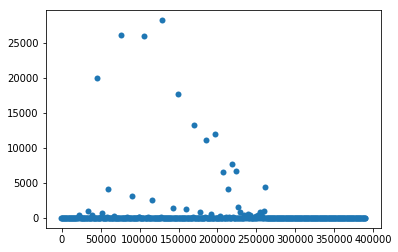

In [1153]:
t= df2.groupby('duration')['event_id'].count().reset_index()
x=np.linspace(mindur,maxdur,num=len(t))
plt.scatter(x=x,y=t['event_id'].values,linewidths=0.001);

### Varying Time Durations
* Negative
* Within 24 hours
* Greater than 24 hours

In [1154]:
df2.sort_values('duration')

,community_board,end_date_time,event_agency,event_borough,event_id,event_location,event_name,event_street_side,event_type,police_precinct,start_date_time,street_closure_type,event_clean,start_date_time_t,end_date_time_t,year,start_time,end_time,duration
125207,"55,",2015-01-01T01:00:00.000,Parks Department,Brooklyn,182917,"Prospect Park: Long Meadow North ,Prospect Par...",New Years Eve Celebration & Fireworks,NaN,Special Event,"78,",2015-01-01T23:00:00.000,NaN,new years eve celebration & fireworks,2015-01-01 23:00:00,2015-01-01 01:00:00,2015,23:00:00,01:00:00,-1 days +02:00:00
159261,"55,",2017-12-31T01:00:00.000,Parks Department,Brooklyn,380641,Prospect Park: Grand Army Plaza Safety Zone Ea...,New Years Eve Celebration & Fireworks,NaN,Special Event,"78,",2017-12-31T23:00:00.000,NaN,new years eve celebration & fireworks,2017-12-31 23:00:00,2017-12-31 01:00:00,2017,23:00:00,01:00:00,-1 days +02:00:00
53986,"55,",2016-01-01T01:00:00.000,Parks Department,Brooklyn,247190,"Prospect Park: Long Meadow North ,Prospect Par...",New Year's Eve Celebration & Fireworks,NaN,Special Event,"78,",2016-01-01T23:00:00.000,NaN,new years eve celebration & fireworks,2016-01-01 23:00:00,2016-01-01 01:00:00,2016,23:00:00,01:00:00,-1 days +02:00:00
159238,"55,",2018-01-01T01:00:00.000,Parks Department,Brooklyn,380641,Prospect Park: Grand Army Plaza Safety Zone Ea...,New Years Eve Celebration & Fireworks,NaN,Special Event,"78,",2018-01-01T23:00:00.000,NaN,new years eve celebration & fireworks,2018-01-01 23:00:00,2018-01-01 01:00:00,2018,23:00:00,01:00:00,-1 days +02:00:00
87646,"55,",2016-12-31T01:00:00.000,Parks Department,Brooklyn,314447,"Prospect Park: Long Meadow North ,Prospect Par...",New Years Eve Celebratiobn & Fireworks,NaN,Special Event,"78,",2016-12-31T23:00:00.000,NaN,new years eve celebratiobn & fireworks,2016-12-31 23:00:00,2016-12-31 01:00:00,2016,23:00:00,01:00:00,-1 days +02:00:00
148650,"55,",2017-01-01T01:00:00.000,Parks Department,Brooklyn,314447,"Prospect Park: Long Meadow North ,Prospect Par...",New Years Eve Celebratiobn & Fireworks,NaN,Special Event,"78,",2017-01-01T23:00:00.000,NaN,new years eve celebratiobn & fireworks,2017-01-01 23:00:00,2017-01-01 01:00:00,2017,23:00:00,01:00:00,-1 days +02:00:00
197968,"55,",2018-12-31T01:00:00.000,Parks Department,Brooklyn,443900,Prospect Park: Grand Army Plaza Safety Zone Ea...,New Years Eve Celebration,NaN,Special Event,"78,",2018-12-31T23:00:00.000,NaN,new years eve celebration,2018-12-31 23:00:00,2018-12-31 01:00:00,2018,23:00:00,01:00:00,-1 days +02:00:00
128272,"55,",2015-12-31T01:00:00.000,Parks Department,Brooklyn,247190,"Prospect Park: Long Meadow North ,Prospect Par...",New Year's Eve Celebration & Fireworks,NaN,Special Event,"78,",2015-12-31T23:00:00.000,NaN,new years eve celebration & fireworks,2015-12-31 23:00:00,2015-12-31 01:00:00,2015,23:00:00,01:00:00,-1 days +02:00:00
197972,"55,",2019-01-01T01:00:00.000,Parks Department,Brooklyn,443900,Prospect Park: Grand Army Plaza Safety Zone Ea...,New Years Eve Celebration,NaN,Special Event,"78,",2019-01-01T23:00:00.000,NaN,new years eve celebration,2019-01-01 23:00:00,2019-01-01 01:00:00,2019,23:00:00,01:00:00,-1 days +02:00:00
104176,"55,",2014-12-31T01:00:00.000,Parks Department,Brooklyn,182917,"Prospect Park: Long Meadow North ,Prospect Par...",New Years Eve Celebration & Fireworks,NaN,Special Event,"78,",2014-12-31T23:00:00.000,NaN,new years eve celebration & fireworks,2014-12-31 23:00:00,2014-12-31 01:00:00,2014,23:00:00,01:00:00,-1 days +02:00:00


In [1155]:
# Negative time duration
mask_negdur= df2['duration']<dt.timedelta(days=0,seconds=0)
df2[mask_negdur].shape

(257, 19)

In [1405]:
df2[mask_negdur].sort_values('duration')

,community_board,end_date_time,event_agency,event_borough,event_id,event_location,event_name,event_street_side,event_type,police_precinct,...,end_date_time_t,year,start_time,end_time,duration,park_short,parkname_length,park_lower,park_tomerge,BOROUGH
197972,55,2019-01-01T01:00:00.000,Parks Department,Brooklyn,443900,Prospect Park: Grand Army Plaza Safety Zone Ea...,New Years Eve Celebration,NaN,Special Event,78,...,2019-01-01 01:00:00,2019,23:00:00,01:00:00,-1 days +02:00:00,Prospect Park,13.0,prospect park,prospect park B,B
87646,55,2016-12-31T01:00:00.000,Parks Department,Brooklyn,314447,"Prospect Park: Long Meadow North ,Prospect Par...",New Years Eve Celebratiobn & Fireworks,NaN,Special Event,78,...,2016-12-31 01:00:00,2016,23:00:00,01:00:00,-1 days +02:00:00,Prospect Park,13.0,prospect park,prospect park B,B
159261,55,2017-12-31T01:00:00.000,Parks Department,Brooklyn,380641,Prospect Park: Grand Army Plaza Safety Zone Ea...,New Years Eve Celebration & Fireworks,NaN,Special Event,78,...,2017-12-31 01:00:00,2017,23:00:00,01:00:00,-1 days +02:00:00,Prospect Park,13.0,prospect park,prospect park B,B
159238,55,2018-01-01T01:00:00.000,Parks Department,Brooklyn,380641,Prospect Park: Grand Army Plaza Safety Zone Ea...,New Years Eve Celebration & Fireworks,NaN,Special Event,78,...,2018-01-01 01:00:00,2018,23:00:00,01:00:00,-1 days +02:00:00,Prospect Park,13.0,prospect park,prospect park B,B
53986,55,2016-01-01T01:00:00.000,Parks Department,Brooklyn,247190,"Prospect Park: Long Meadow North ,Prospect Par...",New Year's Eve Celebration & Fireworks,NaN,Special Event,78,...,2016-01-01 01:00:00,2016,23:00:00,01:00:00,-1 days +02:00:00,Prospect Park,13.0,prospect park,prospect park B,B
128272,55,2015-12-31T01:00:00.000,Parks Department,Brooklyn,247190,"Prospect Park: Long Meadow North ,Prospect Par...",New Year's Eve Celebration & Fireworks,NaN,Special Event,78,...,2015-12-31 01:00:00,2015,23:00:00,01:00:00,-1 days +02:00:00,Prospect Park,13.0,prospect park,prospect park B,B
148650,55,2017-01-01T01:00:00.000,Parks Department,Brooklyn,314447,"Prospect Park: Long Meadow North ,Prospect Par...",New Years Eve Celebratiobn & Fireworks,NaN,Special Event,78,...,2017-01-01 01:00:00,2017,23:00:00,01:00:00,-1 days +02:00:00,Prospect Park,13.0,prospect park,prospect park B,B
104176,55,2014-12-31T01:00:00.000,Parks Department,Brooklyn,182917,"Prospect Park: Long Meadow North ,Prospect Par...",New Years Eve Celebration & Fireworks,NaN,Special Event,78,...,2014-12-31 01:00:00,2014,23:00:00,01:00:00,-1 days +02:00:00,Prospect Park,13.0,prospect park,prospect park B,B
197968,55,2018-12-31T01:00:00.000,Parks Department,Brooklyn,443900,Prospect Park: Grand Army Plaza Safety Zone Ea...,New Years Eve Celebration,NaN,Special Event,78,...,2018-12-31 01:00:00,2018,23:00:00,01:00:00,-1 days +02:00:00,Prospect Park,13.0,prospect park,prospect park B,B
125207,55,2015-01-01T01:00:00.000,Parks Department,Brooklyn,182917,"Prospect Park: Long Meadow North ,Prospect Par...",New Years Eve Celebration & Fireworks,NaN,Special Event,78,...,2015-01-01 01:00:00,2015,23:00:00,01:00:00,-1 days +02:00:00,Prospect Park,13.0,prospect park,prospect park B,B


In [1161]:
# Time duration within 24 hours
mask_daydur= (df2['duration']<=dt.timedelta(days=1,seconds=0))&(df2['duration']>=dt.timedelta(days=0,seconds=0))
df2[mask_daydur].shape

(211125, 19)

In [1169]:
# Time duration greater than 24 hours
mask_posdur= (df2['duration']>=dt.timedelta(days=1,seconds=0))
df2[mask_posdur].shape

(240, 19)

In [1172]:
df2[mask_posdur].sort_values('duration',ascending=False).head(10)

,community_board,end_date_time,event_agency,event_borough,event_id,event_location,event_name,event_street_side,event_type,police_precinct,start_date_time,street_closure_type,event_clean,start_date_time_t,end_date_time_t,year,start_time,end_time,duration
120535,"8,",2018-06-02T23:59:00.000,Parks Department,Queens,367625,"Cunningham Park: Picnic Green 1 ,Cunningham Pa...",under contruction,NaN,Special Event,"107,",2017-09-05T00:00:00.000,NaN,under contruction,2017-09-05 00:00:00,2018-06-02 23:59:00,2017,00:00:00,23:59:00,270 days 23:59:00
104031,"64,",2013-04-08T23:59:00.000,Parks Department,Manhattan,66253,"Central Park: East Meadow ,Central Park: East ...",East Meadow Closure,NaN,Special Event,"22,",2012-10-28T00:00:00.000,NaN,east meadow closure,2012-10-28 00:00:00,2013-04-08 23:59:00,2012,00:00:00,23:59:00,162 days 23:59:00
30995,"14,",2013-09-02T20:00:00.000,Parks Department,Queens,102809,Rockaway Beach and Boardwalk: Beach 67┬á Stree...,Mobile Food Rally,NaN,Special Event,"100,",2013-05-25T11:00:00.000,NaN,mobile food rally,2013-05-25 11:00:00,2013-09-02 20:00:00,2013,11:00:00,20:00:00,100 days 09:00:00
122263,"55,",2012-11-24T17:00:00.000,Parks Department,Brooklyn,69300,"Prospect Park: Grand Army Plaza Arch ,Prospect...",Food Trucks,NaN,Special Event,"78,",2012-09-08T07:00:00.000,NaN,food trucks,2012-09-08 07:00:00,2012-11-24 17:00:00,2012,07:00:00,17:00:00,77 days 10:00:00
83349,"5,",2010-01-24T22:00:00.000,Parks Department,Manhattan,14348,Bryant Park: Bryant Park 6 AVENUE between WEST...,The Pond at Bryant Park,East,Special Event,"14,",2009-11-18T08:00:00.000,Full Street Closure,the pond at bryant park,2009-11-18 08:00:00,2010-01-24 22:00:00,2009,08:00:00,22:00:00,67 days 14:00:00
34038,"11,",2016-11-27T20:00:00.000,Parks Department,Manhattan,287786,Randall's Island Park: Asphalt Pad,Cirque du Soleil KURIOS,NaN,Special Event,"25,",2016-09-28T10:00:00.000,NaN,cirque du soleil kurios,2016-09-28 10:00:00,2016-11-27 20:00:00,2016,10:00:00,20:00:00,60 days 10:00:00
144824,"10,",2009-08-31T20:00:00.000,Parks Department,Bronx,10602,BARTOW AVENUE between HUTCHINSON RIVER PARKWA...,Orchard Beach Concert Series,East,Concert,"45,",2009-07-05T12:00:00.000,Full Street Closure,orchard beach concert series,2009-07-05 12:00:00,2009-08-31 20:00:00,2009,12:00:00,20:00:00,57 days 08:00:00
74066,"07,",2013-09-07T20:30:00.000,Parks Department,Manhattan,109420,"Happy Warrior Playground: Basketball-01 ,Happy...",basketball tournament,NaN,Special Event,"24,",2013-07-15T16:30:00.000,NaN,basketball tournament,2013-07-15 16:30:00,2013-09-07 20:30:00,2013,16:30:00,20:30:00,54 days 04:00:00
11521,"5,",2010-01-03T18:00:00.000,Parks Department,Manhattan,14347,Bryant Park: Bryant Park 6 AVENUE between WEST...,The Holiday Shops at Bryant Park,East,Special Event,"14,",2009-11-18T10:00:00.000,Full Street Closure,the holiday shops at bryant park,2009-11-18 10:00:00,2010-01-03 18:00:00,2009,10:00:00,18:00:00,46 days 08:00:00
40299,"8,",2013-08-23T17:00:00.000,Parks Department,Queens,110301,Vleigh Playground (PS 165): Vleigh Playground ...,Miscellaneous,NaN,Special Event,"107,",2013-07-08T10:00:00.000,NaN,miscellaneous,2013-07-08 10:00:00,2013-08-23 17:00:00,2013,10:00:00,17:00:00,46 days 07:00:00


Plots of Events with Varying Duration Times
* Unsorted to illustrate the clustering of datetimes around 24 hours

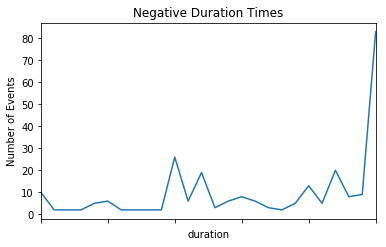

In [1163]:
df2[mask_negdur].groupby('duration')['event_id'].count().plot()
plt.ylabel('Number of Events')
plt.title('Negative Duration Times');

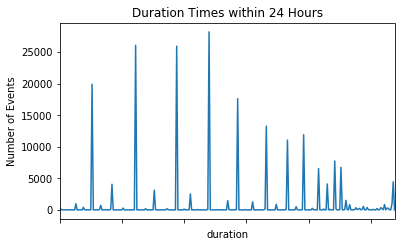

In [1164]:
df2[mask_daydur].groupby('duration')['event_id'].count().plot()
plt.ylabel('Number of Events')
plt.title('Duration Times within 24 Hours');

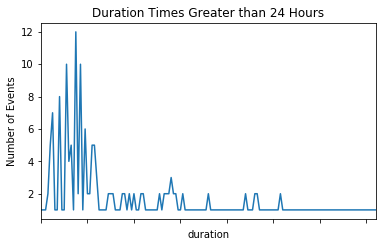

In [1165]:
df2[mask_posdur].groupby('duration')['event_id'].count().plot()
plt.ylabel('Number of Events')
plt.title('Duration Times Greater than 24 Hours');

In [1166]:
df2[mask_daydur].groupby('duration')['event_id'].count().sort_values(ascending=False).head(10)

duration
04:00:00    28229
02:00:00    26097
03:00:00    25970
01:00:00    19916
05:00:00    17637
06:00:00    13280
08:00:00    11919
07:00:00    11068
11:00:00     7756
12:00:00     6749
Name: event_id, dtype: int64

In [1168]:
np.round(df2[mask_daydur].groupby('duration')['event_id'].count().sort_values(ascending=False).values[0:10].sum()*100/len(df2),2)

79.68

### Repeating Events
* Computes the number of events that occurred more than once (corresponding to the event id)
* Computes the number of events that occurred mroe than once in a single year (corresponding to the event id)

In [1227]:
# Compute repeating events by the number of entries with different start times
repeat= df2.groupby('event_id')['start_date_time'].count().sort_values(ascending=False).to_frame().rename(columns={'start_date_time':'timecount'})

In [1229]:
#Percentage of events that occurred more than once
round(float(repeat[repeat['timecount']>1].sum())*100/len(df2),2)

57.44

In [1251]:
#Percentage of events that occurred more than 10 times
round(float(repeat[repeat['timecount']>10].sum())*100/len(df2),2)

41.65

In [1254]:
#Percentage of events that occurred more than 48 times (~weekly)
round(float(repeat[repeat['timecount']>48].sum())*100/len(df2),2)

16.44

In [1257]:
#Percentage of events that occurred more than 350 times (~daily)
round(float(repeat[repeat['timecount']>350].sum())*100/len(df2),2)

0.54

In [1233]:
yr_repeat= df2.groupby(['year'])['event_id'].value_counts()\
                    .to_frame().rename(columns={'event_id':'numevents'})\
                    .sort_values('numevents',ascending=False)
round(float(yr_repeat[yr_repeat['numevents']>1].sum())*100/len(df2),2)

57.37

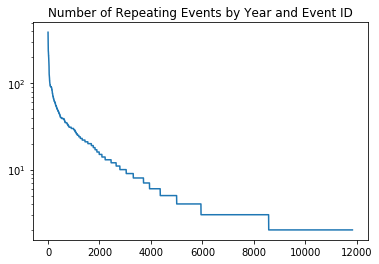

In [1240]:
plt.plot(yr_repeat[yr_repeat['numevents']>1].values)
plt.yscale('log')
plt.title('Number of Repeating Events by Year and Event ID');

In [1250]:
#Are there event ids that occur in different years, i.e. an event occuring in 2008, 2009, 2010, etc.? No!
yr_repeat.reset_index().groupby('event_id')['year'].value_counts().sort_values(ascending=False)

event_id  year
491619    2019    1
196222    2015    1
196225    2015    1
196226    2015    1
196227    2015    1
196228    2015    1
196253    2015    1
196258    2015    1
196265    2015    1
196266    2015    1
196269    2015    1
196277    2015    1
196280    2015    1
196281    2015    1
196290    2015    1
196291    2015    1
196295    2015    1
196296    2015    1
196298    2015    1
196301    2015    1
196305    2015    1
196309    2015    1
196323    2015    1
196224    2015    1
196221    2015    1
196327    2015    1
196220    2015    1
196198    2015    1
196199    2015    1
196200    2015    1
                 ..
336201    2017    1
336202    2017    1
336204    2017    1
336213    2017    1
336219    2017    1
336167    2017    1
336166    2017    1
336157    2017    1
336107    2017    1
336058    2017    1
336060    2017    1
336064    2017    1
336075    2017    1
336099    2017    1
336100    2017    1
336102    2017    1
336104    2017    1
336106    2017    1
33611

__Summary:__
* 257 events have a negative time duration
* 211,125 events occurred within 24 hours
* 240 events occurred with duration greater than 24 hours
* The top 10 most frequent event durations were between 1 and 12 hours. This represents 80% of all events.
* Of events with negative duration: the first ten when sorted refer to New Years Eve celebrations, celebrations, and miscellaneous.
* Of events with durations greater than 24 hours: the first ten when sorted by descending event duration ranged from the East Meadow closure in Central Park to a basketball tournament or the holiday shops at Bryant Park.
* 57% of events occurred more than once, i.e. one event id corresponded to at least 2 different entries with different start times.
* 57% of events occurred a least two times in a single year. This makes sense because as the above table shows, event ids refer to within-year events.
* 41% of events occurred more than ten times.
* 16% occurred more than 48 times (~weekly)
* <1% occurred more than 350 times (~daily)

# Metrics
__Final:__ a dataset to hold metrics for comparison across parks.
* park_tomerge: park name or sign name with the last letter identifying the borough (string)
* AVGEV: average number of events per year in the 11-year period (float)
* TOTEV: total number of events over the 11-year range (float)
* ACRES: park acres (float)

In [1383]:
df2['park_tomerge']= df2['park_short'].str.lower().str.strip().str.replace('.','')
df2['park_tomerge']=df2['park_tomerge']+' '+df2['BOROUGH']
AVGEV= df2.groupby('park_tomerge')['event_id'].count().reset_index().rename(columns={'event_id':'AVGEV'})
AVGEV['AVGEV']= AVGEV['AVGEV']/11

In [1406]:
df2[(df2['park_tomerge'].str.contains('riverside'))&(~df2['park_tomerge'].isna())]

,community_board,end_date_time,event_agency,event_borough,event_id,event_location,event_name,event_street_side,event_type,police_precinct,...,end_date_time_t,year,start_time,end_time,duration,park_short,parkname_length,park_lower,park_tomerge,BOROUGH
43,9,2013-06-30T14:00:00.000,Parks Department,Manhattan,101079,Riverside Park: Lawn-145th Street East-RSP,B.O.A.S.T sports class,NaN,Special Event,30,...,2013-06-30 14:00:00,2013,09:00:00,14:00:00,05:00:00,Riverside Park,14.0,riverside park,riverside park M,M
48,9,2015-08-29T15:00:00.000,Parks Department,Manhattan,228069,Riverside Park: Lawn-145th Street East-RSP,Barbecue,NaN,Special Event,30,...,2015-08-29 15:00:00,2015,11:00:00,15:00:00,04:00:00,Riverside Park,14.0,riverside park,riverside park M,M
56,7,2013-06-07T18:00:00.000,Parks Department,Manhattan,92135,Riverside Park: Lawn-74th St (South Lawn)-RSP,Shakespeare in the Grass - Much Ado About Nothing,NaN,Special Event,20,...,2013-06-07 18:00:00,2013,16:00:00,18:00:00,02:00:00,Riverside Park,14.0,riverside park,riverside park M,M
154,7,2016-10-14T16:30:00.000,Parks Department,Manhattan,305081,Riverside Park: Playground-Classic-RSP,Party,NaN,Special Event,20,...,2016-10-14 16:30:00,2016,14:30:00,16:30:00,02:00:00,Riverside Park,14.0,riverside park,riverside park M,M
229,7,2013-09-08T15:30:00.000,Parks Department,Manhattan,110013,Riverside Park: 80th St - North Lawn,Picnic,NaN,Special Event,20,...,2013-09-08 15:30:00,2013,12:30:00,15:30:00,03:00:00,Riverside Park,14.0,riverside park,riverside park M,M
246,9,2012-08-02T20:30:00.000,Parks Department,Manhattan,65202,Riverside Park: Lawn-116th Street-RSP,Party,NaN,Special Event,26,...,2012-08-02 20:30:00,2012,18:30:00,20:30:00,02:00:00,Riverside Park,14.0,riverside park,riverside park M,M
258,7,2014-06-05T15:00:00.000,Parks Department,Manhattan,151115,Riverside Park: Playground-Neufield-RSP,Picnic,NaN,Special Event,20,...,2014-06-05 15:00:00,2014,11:00:00,15:00:00,04:00:00,Riverside Park,14.0,riverside park,riverside park M,M
274,7,2016-06-21T12:00:00.000,Parks Department,Manhattan,264041,Riverside Park: Playground-Hippo (91st)-RSP,Hippo Playground Summer Art in the Park,NaN,Special Event,24,...,2016-06-21 12:00:00,2016,10:00:00,12:00:00,02:00:00,Riverside Park,14.0,riverside park,riverside park M,M
299,7,2016-06-08T20:00:00.000,Parks Department,Manhattan,251886,Riverside Park: Soliders & Sailors North Overl...,Hudson Warehouse,NaN,Special Event,24,...,2016-06-08 20:00:00,2016,17:00:00,20:00:00,03:00:00,Riverside Park,14.0,riverside park,riverside park M,M
339,7,2017-07-11T20:00:00.000,Parks Department,Manhattan,317637,Riverside Park South: 66th Street Plaza,Pilates in the Park,NaN,Special Event,20,...,2017-07-11 20:00:00,2017,18:00:00,20:00:00,02:00:00,Riverside Park South,20.0,riverside park south,riverside park south M,M


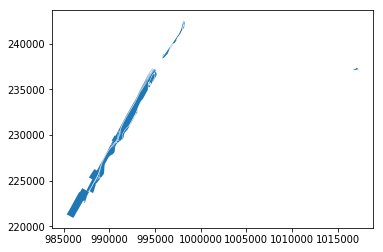

In [1409]:
parks[parks['SIGNNAME'].str.contains('Riverside')].plot();

In [1385]:
TOTEV= df2.groupby('park_tomerge')['event_id'].count().reset_index().rename(columns={'event_id':'TOTEV'})

In [1389]:
parks['park_tomerge']= parks['SIGNNAME'].str.lower().str.strip().str.replace('.','')
parks['park_tomerge']=parks['park_tomerge']+' '+parks['BOROUGH']
ACRES= parks[['park_tomerge','ACRES']]

In [1392]:
#Shows duplicated park names, even within borough.
ACRES[ACRES.duplicated('park_tomerge')].sort_values('park_tomerge')

,park_tomerge,ACRES
1230,aqueduct walk X,8.607
1441,battery park city M,28.434
1424,broadway malls M,1.139
1427,broadway malls M,1.300
1426,broadway malls M,5.605
959,brooklyn heights promenade B,0.040
957,brooklyn heights promenade B,0.108
1669,brooklyn heights promenade B,1.093
405,brooklyn heights promenade B,0.320
1671,brooklyn heights promenade B,0.090


In [1388]:
final= pd.merge(pd.merge(AVGEV,ACRES,on='park_tomerge',how='inner'),TOTEV,on='park_tomerge',how='inner')
final.sort_values('AVGEV',ascending=False)

,park_tomerge,AVGEV,ACRES,TOTEV
159,central park M,3477.636364,840.010,38254
677,prospect park B,1019.363636,526.250,11213
131,bryant park M,555.454545,9.603,6110
715,riverside park M,473.727273,222.415,5211
716,riverside park M,473.727273,13.350,5211
309,flushing meadows corona park Q,456.727273,897.690,5024
541,marine park B,428.181818,798.000,4710
872,union square park M,374.727273,6.510,4122
878,van cortlandt park X,368.636364,1146.430,4055
222,cunningham park Q,339.727273,358.000,3737


In [1355]:
final.corr()

,AVGEV,ACRES,TOTEV
AVGEV,1.000000,0.360413,1.000000
ACRES,0.360413,1.000000,0.360413
TOTEV,1.000000,0.360413,1.000000


In [1357]:
parks[parks['SIGNNAME'].str.contains('Riverside')]

,GISPROPNUM,LOCATION,COMMUNITYB,COUNCILDIS,PRECINCT,ZIPCODE,BOROUGH,ACRES,ADDRESS,SIGNNAME,TYPECATEGO,WATERFRONT,NYS_ASSEMB,NYS_SENATE,US_CONGRES,geometry,parks_lower,park_lower,park_tomerge
20,M353,"12 Ave., Riverside Blvd. bet. W. 59 St. and W....",107,6,20,"10019, 10023",M,66.693,400 RIVERSIDE DRIVE,Riverside Park South,Community Park,Yes,67,31,10,"POLYGON ((987805.6441234648 223723.124125734, ...",riverside park south,riverside park south,riverside park southM
1192,M071,"Riverside Dr. to Hudson River, W. 72 St.to St ...","107, 109","6,7",20,"10023, 10024, 10025",M,222.415,None,Riverside Park,Community Park,Yes,"69, 70, 67",31,"10, 13",(POLYGON ((995038.5971772224 237150.3216807246...,riverside park,riverside park,riverside parkM
1367,X336,Lafayette Av bet. Edgewater Rd and the Bronx R...,202,17,41,10474,X,0.426,None,Hunts Point Riverside Park,Neighborhood Park,Yes,"84, 85",34,15,"POLYGON ((1017075.433352798 237358.0059766471,...",hunts point riverside park,hunts point riverside park,hunts point riverside parkX
1696,M072,"Riverside Dr to Henry Hudson Pkwy, W 153 St",109,7,30,"10027, 10031",M,13.350,675 RIVERSIDE DRIVE,Riverside Park,Neighborhood Park,No,"70, 71",31,13,(POLYGON ((997549.4182710499 240799.0282940567...,riverside park,riverside park,riverside parkM
